In [102]:
import pandas as pd

In [105]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
unDSData = pd.read_csv("./wine_con_nombres.csv")
unDSName = pd.read_csv("./wineNames.csv")

In [106]:
unDSData.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [107]:
unDSData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
OD280OD315              178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


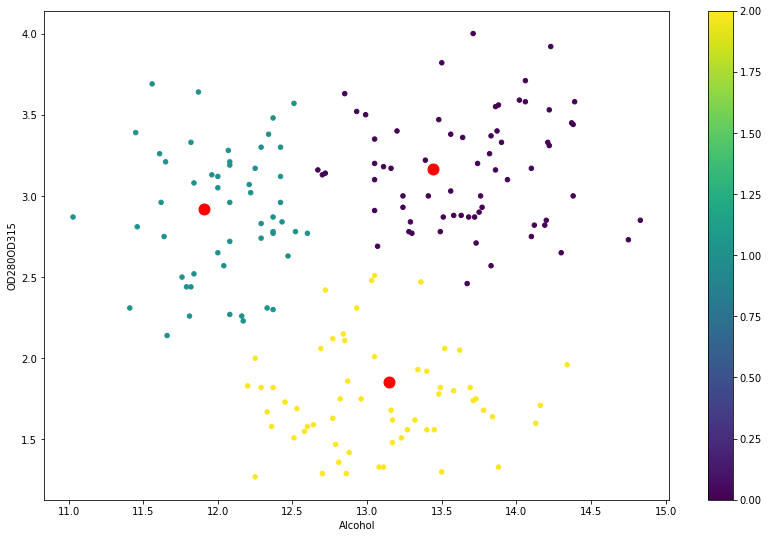

In [108]:
unKmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(wineDF.iloc[:,[12,1]])
wineDF = pd.DataFrame(unDSData)
wineDF.Class = wineDF.Class - 1
fig, ax = plt.subplots(1, 1)
calcCentroidesDF = pd.DataFrame(unKmeans.cluster_centers_, columns = list(wineDF.iloc[:,[12,1]].columns.values))
wineDF.plot.scatter(x = 'Alcohol', y = 'OD280OD315', c= unKmeans.labels_, figsize=(14,9), colormap='viridis', ax=ax, mark_right=False)
calcCentroidesDF.plot.scatter(x = 'Alcohol', y = 'OD280OD315', c = 'red', ax = ax,  s = 120, mark_right=False)

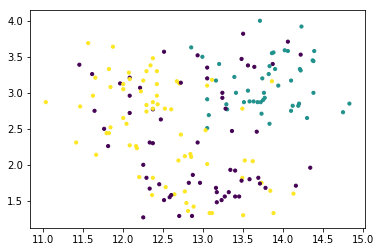

In [109]:
otrokmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(wineDF.iloc[:,[12,1]])
y_kmeans = otroKmeans.predict(wineDF)
wineDF.plot.scatter(x = 'Alcohol', y = 'OD280OD315', c= y_kmeans, figsize=(12,8), colormap='viridis', ax=ax, mark_right=False)
otroKmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
otroKmeans.fit(wineDF) 
kmeansY = otroKmeans.predict(wineDF)
plt.scatter(x = wineDF.Alcohol, y = wineDF.OD280OD315, c=y_kmeans, s=10, cmap='viridis')